In [1]:
# Importing required modules and trying to create a Linear SVC by feature scaling(Standardization) using StandardScaler
import numpy as np 
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
#downloading iris dataset from datasets module of python and filtering out required columns 
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]#petal length, petal width columns of the data
y = (iris['target'] == 2).astype(np.float64) #Iris Virginca

svm_clf = Pipeline([('standard_scaler',StandardScaler()),
                    ('kinear_svc',LinearSVC(C= 1, loss='hinge'))])

svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kinear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [3]:
svm_clf.predict([[3.5,1.7]])

array([0.])

In [4]:
#Code to plot decision boundary for SVM which requires the svm classifier object and 
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

NameError: name 'plt' is not defined

In [5]:
#same SVC with linear kernel and also we can use SGD classifier in this case which will not converge as fast as linearSVC
#SGDClassifier is useful if we are trying to do it on huge datasets
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
svm_clf_svc = Pipeline([('standard_scaler',StandardScaler()),
                    ('linear_svc',SVC(kernel='linear', C = 1))])
svm_clf_sgd = Pipeline([('standard_scaler',StandardScaler()),
                    ('sgd_clf',SGDClassifier(loss='hinge'))])

svm_clf_svc.fit(X,y)
svm_clf_sgd.fit(X,y)

svm_clf_svc.predict([[5.5,1.7]])
svm_clf_sgd.predict([[5.0,1.7]])


array([1.])

In [6]:
#Creating a non-linear SVM classification using polynomial features class 
#to create a non-linear data from make_moons dataset
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
X,y = make_moons(n_samples=100, noise= 0.15)

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline 

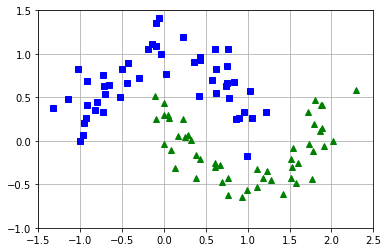

In [8]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.grid(True,axis='both')
plt.axis([-1.5, 2.5, -1, 1.5])
plt.show()

In [9]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

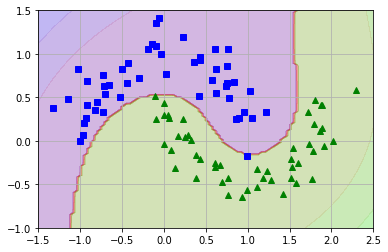

In [10]:
#plot to show linear SVM classifier using polynomial features
axes = [-1.5, 2.5, -1, 1.5]
clf = polynomial_svm_clf
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = clf.predict(X_new).reshape(x0.shape)
y_decision = clf.decision_function(X_new).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.grid(True,axis='both')
plt.axis([-1.5, 2.5, -1, 1.5])
plt.show()

In [11]:
poly_kernel_svm_clf = Pipeline([('standard_scaler',StandardScaler()),
                               ('polynomial_kernel',SVC(kernel = 'poly',degree = 3, coef0=1, C= 5))])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial_kernel',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

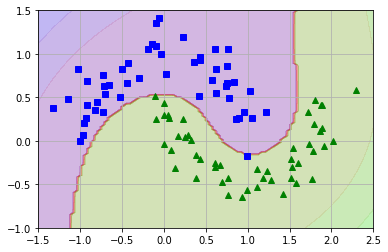

In [12]:
#degree = 3, C= 5, r = 1
axes = [-1.5, 2.5, -1, 1.5]
clf = polynomial_svm_clf
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = clf.predict(X_new).reshape(x0.shape)
y_decision = clf.decision_function(X_new).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.grid(True,axis='both')
plt.axis([-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
poly_kernel_svm_clf = Pipeline([('standard_scaler',StandardScaler()),
                               ('polynomial_kernel',SVC(kernel = 'poly',degree = 10, coef0=50, C= 5))])
poly_kernel_svm_clf.fit(X,y)

In [ ]:
#degree = 10, C= 5, r = 100
axes = [-1.5, 2.5, -1, 1.5]
clf = polynomial_svm_clf
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = clf.predict(X_new).reshape(x0.shape)
y_decision = clf.decision_function(X_new).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.grid(True,axis='both')
plt.axis([-1.5, 2.5, -1, 1.5])
plt.show()

In [19]:
#implementing the above approach using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
make_scorer(fbeta_score, beta=2)
from sklearn.model_selection import GridSearchCV
param_grid = [{'kernel':['poly'],'degree':[3,10],'coef0':[1,100],'C':[5]}]
svm_reg = SVC()
grid_cv = GridSearchCV(svm_reg,param_grid,cv = 5, verbose = 2, scoring=ftwo_scorer)
grid_cv.fit(X,y)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=5, coef0=1, degree=3, kernel=poly .............................
[CV] .............. C=5, coef0=1, degree=3, kernel=poly, total=   0.0s
[CV] C=5, coef0=1, degree=3, kernel=poly .............................
[CV] .............. C=5, coef0=1, degree=3, kernel=poly, total=   0.0s
[CV] C=5, coef0=1, degree=3, kernel=poly .............................
[CV] .............. C=5, coef0=1, degree=3, kernel=poly, total=   0.0s
[CV] C=5, coef0=1, degree=3, kernel=poly .............................
[CV] .............. C=5, coef0=1, degree=3, kernel=poly, total=   0.0s
[CV] C=5, coef0=1, degree=3, kernel=poly .............................
[CV] .............. C=5, coef0=1, degree=3, kernel=poly, total=   0.0s
[CV] C=5, coef0=1, degree=10, kernel=poly ............................
[CV] ............. C=5, coef0=1, degree=10, kernel=poly, total=   0.0s
[CV] C=5, coef0=1, degree=10, kernel=poly ............................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=5, coef0=100, degree=3, kernel=poly, total=   0.2s
[CV] C=5, coef0=100, degree=3, kernel=poly ...........................
[CV] ............ C=5, coef0=100, degree=3, kernel=poly, total=   0.1s
[CV] C=5, coef0=100, degree=3, kernel=poly ...........................
[CV] ............ C=5, coef0=100, degree=3, kernel=poly, total=   0.1s
[CV] C=5, coef0=100, degree=3, kernel=poly ...........................
[CV] ............ C=5, coef0=100, degree=3, kernel=poly, total=   0.2s
[CV] C=5, coef0=100, degree=3, kernel=poly ...........................
[CV] ............ C=5, coef0=100, degree=3, kernel=poly, total=   0.0s
[CV] C=5, coef0=100, degree=10, kernel=poly ..........................
[CV] ........... C=5, coef0=100, degree=10, kernel=poly, total=   0.0s
[CV] C=5, coef0=100, degree=10, kernel=poly ..........................
[CV] ........... C=5, coef0=100, degree=10, kernel=poly, total=   0.0s
[CV] C=5, coef0=100, degree=10, kernel=poly ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [5], 'coef0': [1, 100], 'degree': [3, 10],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [18]:
grid_cv.best_params_

{'C': 5, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}